In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
%matplotlib inline 

In [2]:
# Load original data set
data_path = '/Users/zhaoze/Desktop/metis/week1/Turnstile_Usage_Data__2018.csv'
freq = 'H' # 'D' = '1 day' , 'H' = '1 hour' 
df_orig = pd.read_csv(data_path)
df_orig

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,2056268,5177036
1,A033,R170,02-06-01,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,70294362,20274025
2,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,14197229,13704110
3,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,1806541,2182381
4,A033,R170,02-00-05,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,15598097,6250334
5,A033,R170,02-00-03,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,6069026,7074661
6,A033,R170,02-00-04,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,4927946,3748371
7,A033,R170,02-00-01,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,1806541,2182381
8,A033,R170,02-06-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,694109,207786
9,A033,R170,02-06-01,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,70294362,20274025


In [3]:
import re
df = df_orig.copy()
# Truncating data set
mask = df_orig['Date'].map(lambda x: re.search('(05|06)/.+/2018', x) != None)
df = df_orig[mask]
df = df[df.Station.isin(['34 ST-PENN STA','GRD CNTRL-42 ST','42 ST-PORT AUTH','14 ST-UNION SQ','TIMES SQ-42 ST'])]
# Adding new column 'Full Time' with data and time information
df['Full Time']=pd.to_datetime(df['Date'] + ' ' + df['Time'], format = '%m/%d/%Y %H:%M:%S')

# Delete whitespace
df = df.rename(columns=lambda x: x.strip())

df

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Full Time
4937164,A021,R032,01-00-04,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,1836478,2856814,2018-06-30 00:00:00
4937165,A021,R032,01-00-05,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,1404752,4791549,2018-06-30 00:00:00
4937166,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,7910567,9545486,2018-06-30 00:00:00
4937167,A021,R032,01-00-02,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,1878418,1862751,2018-06-30 00:00:00
4937168,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,2707224,3165992,2018-06-30 00:00:00
4937169,A021,R032,01-00-07,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,2303302,4074434,2018-06-30 00:00:00
4937170,A021,R032,01-00-06,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,1547165,4951939,2018-06-30 00:00:00
4937171,A021,R032,01-00-03,TIMES SQ-42 ST,ACENQRS1237W,BMT,06/30/2018,00:00:00,REGULAR,1984512,956607,2018-06-30 00:00:00
4937772,N062,R011,01-05-01,42 ST-PORT AUTH,ACENQRS1237W,IND,06/30/2018,00:00:00,REGULAR,262144,65586,2018-06-30 00:00:00
4937773,N062,R011,01-03-01,42 ST-PORT AUTH,ACENQRS1237W,IND,06/30/2018,00:00:00,REGULAR,14532151,6409628,2018-06-30 00:00:00


In [4]:
print(df['Full Time'].min(),df['Full Time'].max())

2018-05-01 00:00:00 2018-06-30 22:00:00


In [5]:
# Create a group dataframe for each individual turnstile
gdf = df.groupby(['Station','Line Name','SCP','C/A','Unit'])

print('Number of turnstiles : ',len(gdf))

Number of turnstiles :  302


In [6]:
# Pick out times to query
times_query = pd.date_range('2018-05-01 00:00:00','2018-06-30 00:00:00',freq = freq)
times_query

DatetimeIndex(['2018-05-01 00:00:00', '2018-05-01 01:00:00',
               '2018-05-01 02:00:00', '2018-05-01 03:00:00',
               '2018-05-01 04:00:00', '2018-05-01 05:00:00',
               '2018-05-01 06:00:00', '2018-05-01 07:00:00',
               '2018-05-01 08:00:00', '2018-05-01 09:00:00',
               ...
               '2018-06-29 15:00:00', '2018-06-29 16:00:00',
               '2018-06-29 17:00:00', '2018-06-29 18:00:00',
               '2018-06-29 19:00:00', '2018-06-29 20:00:00',
               '2018-06-29 21:00:00', '2018-06-29 22:00:00',
               '2018-06-29 23:00:00', '2018-06-30 00:00:00'],
              dtype='datetime64[ns]', length=1441, freq='H')

In [7]:
# Initialize empty dataframe to append entries
df_all = pd.DataFrame()

# iterates over turnstiles
for i, (name, group) in enumerate(gdf):    
    # filter out only relevant columns
    df_dev = group[['Station','Line Name','SCP','C/A','Unit','Full Time','Entries','Exits']]

    # Interpolate all numerical values 
    df_dev = df_dev.sort_values(by=['Full Time'])
    df_dev = df_dev.set_index('Full Time')
    df_dev = df_dev.drop_duplicates()
    df_dev = df_dev.loc[~df_dev.index.duplicated()]
    newindex = df_dev.index.union(pd.Index(times_query))
    newindex = newindex.drop_duplicates()
    df_dev = df_dev.reindex(index = newindex)
    df_dev.sort_index()
    df_dev = df_dev.interpolate(method = 'time')
    df_dev = df_dev.loc[times_query,:]

    # Find absolute value of differences
    df_dev.sort_index()
    df_dev['Entries_diff']=df_dev['Entries'].diff().abs()
    df_dev['Exits_diff']=df_dev['Exits'].diff().abs()
    
    # Fill in missing Nan's in other columns
    def_values = {'Station':name[0],'Line Name':name[1],'SCP':name[2],'C/A':name[3],'Unit':name[4]}
    df_dev = df_dev.fillna(value = def_values)

    # Appends entries per day data for each turnstile.
    df_dev['Full Time'] = df_dev.index
    df_all = pd.concat([df_all,df_dev],ignore_index = True)
        
    if i % 100 == 0:
        print(i, *name)

0 14 ST-UNION SQ 456LNQRW 01-00-00 R221 R170
100 34 ST-PENN STA ACE 00-06-01 N067 R012
200 GRD CNTRL-42 ST 4567S 00-00-03 R241A R048
300 TIMES SQ-42 ST ACENQRS1237W 01-00-06 A021 R032


In [8]:
df_all

,Station,Line Name,SCP,C/A,Unit,Entries,Exits,Entries_diff,Exits_diff,Full Time
0,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,NaN,NaN,NaN,NaN,2018-05-01 00:00:00
1,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12862756.00,7702884.00,NaN,NaN,2018-05-01 01:00:00
2,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12862777.00,7702890.50,21.00,6.50,2018-05-01 02:00:00
3,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12862798.00,7702897.00,21.00,6.50,2018-05-01 03:00:00
4,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12862819.00,7702903.50,21.00,6.50,2018-05-01 04:00:00
5,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12862840.00,7702910.00,21.00,6.50,2018-05-01 05:00:00
6,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12863092.75,7702984.50,252.75,74.50,2018-05-01 06:00:00
7,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12863345.50,7703059.00,252.75,74.50,2018-05-01 07:00:00
8,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12863598.25,7703133.50,252.75,74.50,2018-05-01 08:00:00
9,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,12863851.00,7703208.00,252.75,74.50,2018-05-01 09:00:00


In [9]:
# Postprocessing
df_all_new = df_all.dropna() # removes nan's due to interpolation at end cases
df_all_new = df_all_new.reset_index(drop=True)
#df_all_new = df_all_new[df_day_new['Full Time'] >= '2018-05-06'] # 2018-05-06 is 8 weeks prior to 2018-07-01 
df_all_new = df_all_new.drop(columns=['Entries','Exits'])
threshold = 15000
print('fraction excluded due to threshold criteria: ', len(df_all_new[df_all_new['Entries_diff']>=threshold])/len(df_all_new))
df_all_new = df_all_new.drop(df_all_new[df_all_new['Entries_diff']>=threshold].index)
df_all_new = df_all_new.rename(index=str, columns={"Entries_diff": "Entries_every_"+freq,"Exits_diff": "Exits_every_"+freq})
df_all_new 

fraction excluded due to threshold criteria:  0.000147217813355416


,Station,Line Name,SCP,C/A,Unit,Entries_every_H,Exits_every_H,Full Time
0,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 02:00:00
1,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 03:00:00
2,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 04:00:00
3,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 05:00:00
4,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 06:00:00
5,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 07:00:00
6,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 08:00:00
7,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 09:00:00
8,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 10:00:00
9,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 11:00:00


In [10]:
# Save csv and pickle file
df_all_new.to_csv('Data_every_'+freq+'.csv')
with open('Entries_per_'+freq+'.p', 'wb') as to_write:
    pickle.dump(df_all_new, to_write)

In [11]:
df = df_all_new
df.sort_values(by='Entries_every_H', ascending=False)
df = df[df['Entries_every_H'] < 15000]
# df = df.loc[(df['Entries_per_day'] > 0), :]
df = df[df['Entries_every_H'] > 0]

# df['Full Time'] = pd.to_datetime(df['Full Time'])
df['weekday'] = df['Full Time'].dt.weekday
df

,Station,Line Name,SCP,C/A,Unit,Entries_every_H,Exits_every_H,Full Time,weekday
0,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 02:00:00,1
1,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 03:00:00,1
2,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 04:00:00,1
3,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 05:00:00,1
4,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 06:00:00,1
5,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 07:00:00,1
6,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 08:00:00,1
7,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 09:00:00,1
8,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 10:00:00,1
9,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 11:00:00,1


In [12]:
# remove weekend data
df = df[df.weekday.isin([0, 1, 2, 3, 4])]
df

,Station,Line Name,SCP,C/A,Unit,Entries_every_H,Exits_every_H,Full Time,weekday
0,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 02:00:00,1
1,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 03:00:00,1
2,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 04:00:00,1
3,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 05:00:00,1
4,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 06:00:00,1
5,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 07:00:00,1
6,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 08:00:00,1
7,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 09:00:00,1
8,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 10:00:00,1
9,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 11:00:00,1


In [13]:
df['hour'] = df['Full Time'].dt.hour
df


/Users/zhaoze/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Station,Line Name,SCP,C/A,Unit,Entries_every_H,Exits_every_H,Full Time,weekday,hour
0,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 02:00:00,1,2
1,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 03:00:00,1,3
2,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 04:00:00,1,4
3,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,21.00,6.50,2018-05-01 05:00:00,1,5
4,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 06:00:00,1,6
5,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 07:00:00,1,7
6,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 08:00:00,1,8
7,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,252.75,74.50,2018-05-01 09:00:00,1,9
8,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 10:00:00,1,10
9,14 ST-UNION SQ,456LNQRW,01-00-00,R221,R170,223.50,199.25,2018-05-01 11:00:00,1,11


In [14]:
dfwkday = (df
 .groupby(['Station', 'hour'])
 .sum()
 .reset_index()
 .sort_values(['Station', 'hour'])
)

dfwkday

,Station,hour,Entries_every_H,Exits_every_H,weekday
0,14 ST-UNION SQ,0,148667.062500,50006.000000,3291
1,14 ST-UNION SQ,1,148667.062500,50006.000000,3291
2,14 ST-UNION SQ,2,12103.645833,7176.625000,3209
3,14 ST-UNION SQ,3,12103.645833,7176.625000,3209
4,14 ST-UNION SQ,4,12103.645833,7176.625000,3209
5,14 ST-UNION SQ,5,12103.645833,7176.625000,3209
6,14 ST-UNION SQ,6,97870.869133,204082.406080,3330
7,14 ST-UNION SQ,7,97870.869133,204082.406080,3330
8,14 ST-UNION SQ,8,97870.869133,204082.406080,3330
9,14 ST-UNION SQ,9,98301.475934,204216.781761,3330


([<matplotlib.axis.XTick at 0x117f89400>,
 <a list of 9 Text xticklabel objects>)

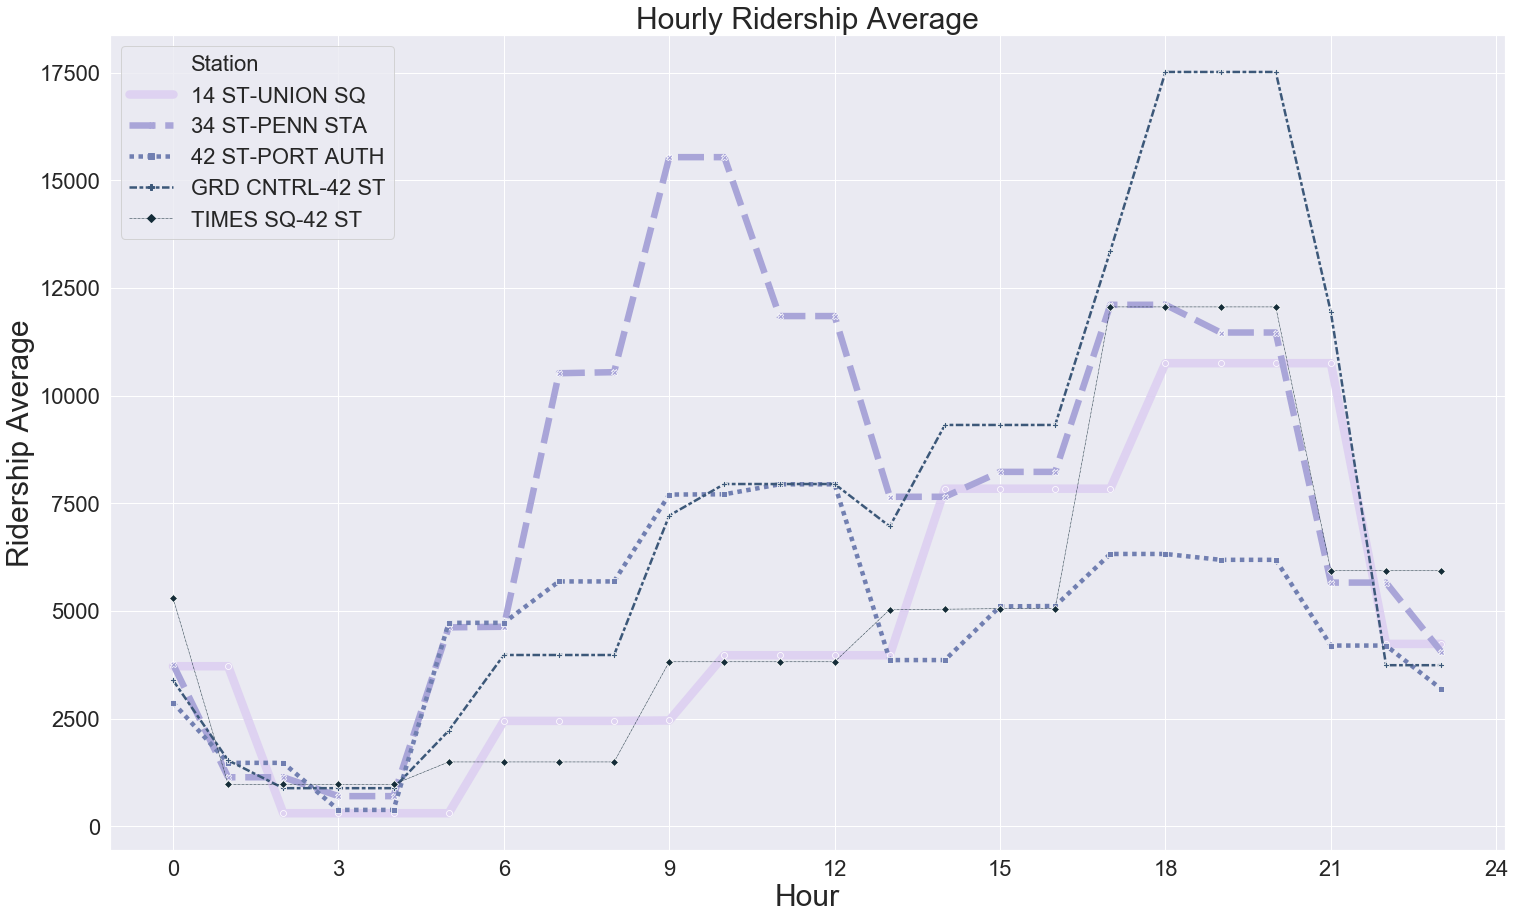

In [15]:
dfwkday['Entries_every_H'] = dfwkday['Entries_every_H'] / 40
dfwkday['Exits_every_H'] = dfwkday['Exits_every_H'] / 40

plt.figure(figsize=(25,15))
sns.set(font_scale = 2)
ax = sns.lineplot(x="hour", y="Entries_every_H",hue="Station", style="Station", palette="ch:2.5,.25", size="Station", sizes=(0.5, 8.5), markers=True, data=dfwkday, sort=False)
sns.set(rc={'axes.facecolor':'white' })
ax.set_title('Hourly Ridership Average', fontsize = 30)
ax.set_xlabel("Hour",fontsize=30)
ax.set_ylabel("Ridership Average",fontsize=30)
ticks_x = np.linspace(0, 24, 9)
plt.xticks(ticks_x)